# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías
from scipy import stats as st
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import os

## Cargar datos

In [2]:
# carga de datasets
path_users = os.path.join('Datasets', 'megaline_users.csv')
Path_calls =  os.path.join('Datasets', 'megaline_calls.csv')
path_messages = os.path.join('Datasets', 'megaline_messages.csv')
path_plans = os.path.join('Datasets', 'megaline_plans.csv')
path_internet = os.path.join('Datasets', 'megaline_internet.csv')

# Carga los archivos de datos en diferentes DataFrames
users_df = pd.read_csv('Datasets/megaline_users.csv')
calls_df = pd.read_csv('Datasets/megaline_calls.csv')
messages_df = pd.read_csv('Datasets/megaline_messages.csv')
plans_df = pd.read_csv('Datasets/megaline_plans.csv')
internet_df = pd.read_csv('Datasets/megaline_internet.csv')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

In [3]:
#Revisar datos iniciales del dataset "users_df"
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [4]:
#Revisar datos iniciales del dataset "calls_df"
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [5]:
#Revisar datos iniciales del dataset "messages_df"
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [6]:
#Revisar datos iniciales del dataset "internet_df"
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [7]:
#Revisar datos iniciales del dataset "plans_df"
plans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


## Tarifas

In [8]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [9]:
# Imprime una muestra de los datos para las tarifas
plans_df.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Observaciones:
1. Se evidencian 2 filas unicamente desccribiendo los planes Surf y Ultimate
2. Se evidencia que según la descripción del proyecto, los nombres de las columnas del dataset son diferentes a la descripción.
3. la mayoría de datos son más númericos (int y float), dado que es un dataset netamente de valores y tarifas
4. Se evidencia que en el dataset no hay una columna donde refleje los valores como megabytes

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [10]:
# 1. Alinear nombre de columna con el diccionario de datos
plans_df.rename(columns={'usd_monthly_pay': 'usd_monthly_fee'}, inplace=True)

# 2. Normalizar nombres de planes (minúsculas, sin espacios)
plans_df["plan_name"] = plans_df["plan_name"].astype(str).str.strip().str.lower()

# 3. Convertir a tipo categórico para optimizar memoria y validar valores
valid_plans = pd.CategoricalDtype(categories=["surf", "ultimate"], ordered=False)
plans_df["plan_name"] = plans_df["plan_name"].astype(valid_plans)

# 4. Verificar los cambios realizados
print("DATOS CORREGIDOS")
print(plans_df.head())
print("\n TIPOS DE DATOS ")
print(plans_df.dtypes)

DATOS CORREGIDOS
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_fee  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  

 TIPOS DE DATOS 
messages_included           int64
mb_per_month_included       int64
minutes_included            int64
usd_monthly_fee             int64
usd_per_gb                  int64
usd_per_message           float64
usd_per_minute            float64
plan_name                category
dtype: object


## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [11]:
#se convierten los datos de gigabyte a megabytes
plans_df["gb_per_month_included"] = (plans_df["mb_per_month_included"] / 1024).round().astype("Int64")
plans_df["usd_per_mb"] = plans_df["usd_per_gb"] / 1024 
plans_df.head()

#podemos visualizar los datos de la tabla de forma traspuesta para analizarlos más facílmente
plans_df_t = plans_df.T
print(plans_df_t)

#ordenamos las columnas en el orden que aparecen en la descripción del proyecto
order = [
    "plan_name",
    "usd_monthly_fee",
    "minutes_included", "messages_included",
    "mb_per_month_included", "gb_per_month_included",
    "usd_per_gb", "usd_per_mb",
    "usd_per_message", "usd_per_minute",
]
plans_df = plans_df.reindex(columns=order)

#imprimimos los valores del dataset modificados
plans_df.head()

                              0         1
messages_included            50      1000
mb_per_month_included     15360     30720
minutes_included            500      3000
usd_monthly_fee              20        70
usd_per_gb                   10         7
usd_per_message            0.03      0.01
usd_per_minute             0.03      0.01
plan_name                  surf  ultimate
gb_per_month_included        15        30
usd_per_mb             0.009766  0.006836


,plan_name,usd_monthly_fee,minutes_included,messages_included,mb_per_month_included,gb_per_month_included,usd_per_gb,usd_per_mb,usd_per_message,usd_per_minute
0,surf,20,500,50,15360,15,10,0.009766,0.03,0.03
1,ultimate,70,3000,1000,30720,30,7,0.006836,0.01,0.01


## Usuarios/as

In [12]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [13]:
# Imprime una muestra de datos para usuarios
users_df.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Observaciones:
1. En la  Columna "Churn_date" hay solo 34 valores no nulos, pero no es clara la información en las instrucciones el porque o con cuál valor debe ir si es nulo o si se mantiene activo.
2. En "red_date" se entiende que hay que cambiar el formato de fecha de AAAA-MM-DD a DD-MM-AA
3. En la Columna "city" tenemos separadores de "-" que se pueden reemplazar por ","

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [14]:
# Limpieza como string
users_df["first_name"] = users_df["first_name"].astype(str).str.strip().str.lower()
users_df["last_name"] = users_df["last_name"].astype(str).str.strip().str.lower()
users_df["city"] = users_df["city"].astype(str).str.strip().str.lower().str.replace('-',', ')

# Se corrige el formato de fecha para las columnas "reg_date" y "churn_date"
users_df["reg_date"]   = pd.to_datetime(users_df["reg_date"], errors="coerce")
users_df["churn_date"] = pd.to_datetime(users_df["churn_date"], errors="coerce")
users_df["reg_date"] = users_df["reg_date"].dt.strftime("%d-%m-%y")
users_df["churn_date"] = users_df["churn_date"].dt.strftime("%d-%m-%y")
users_df.sample(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
276,1276,karmen,carney,20,"phoenix, mesa, chandler, az msa",14-02-18,surf,NaN
293,1293,lanny,nolan,23,"philadelphia, camden, wilmington, pa, nj, de, ...",13-08-18,surf,NaN
222,1222,cleo,anderson,18,"los angeles, long beach, anaheim, ca msa",27-06-18,surf,NaN
345,1345,pasquale,caldwell,26,"los angeles, long beach, anaheim, ca msa",12-07-18,surf,NaN
350,1350,al,rasmussen,29,"atlanta, sandy springs, roswell, ga msa",09-03-18,surf,NaN
275,1275,elvie,velazquez,33,"new york, newark, jersey city, ny, nj, pa msa",29-11-18,ultimate,NaN
32,1032,delila,dalton,59,"birmingham, hoover, al msa",07-06-18,ultimate,NaN
136,1136,jasper,caldwell,25,"knoxville, tn msa",14-10-18,surf,NaN
450,1450,errol,marquez,67,"bakersfield, ca msa",16-06-18,ultimate,NaN
51,1051,rosario,gibbs,55,"san diego, chula vista, carlsbad, ca msa",11-12-18,surf,NaN


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [15]:
#ordenamos las columnas en el orden que aparecen en la descripción del proyecto
order = [
    "user_id",
    "first_name",
    "last_name", "age",
    "reg_date", "churn_date",
    "city", "plan",
    ]
users_df = users_df.reindex(columns=order)

#imprimimos los valores del dataset modificados
users_df.head()


,user_id,first_name,last_name,age,reg_date,churn_date,city,plan
0,1000,anamaria,bauer,45,24-12-18,NaN,"atlanta, sandy springs, roswell, ga msa",ultimate
1,1001,mickey,wilkerson,28,13-08-18,NaN,"seattle, tacoma, bellevue, wa msa",surf
2,1002,carlee,hoffman,36,21-10-18,NaN,"las vegas, henderson, paradise, nv msa",surf
3,1003,reynaldo,jenkins,52,28-01-18,NaN,"tulsa, ok msa",surf
4,1004,leonila,thompson,40,23-05-18,NaN,"seattle, tacoma, bellevue, wa msa",surf


## Llamadas

In [16]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [17]:
# Imprime una muestra de datos para las llamadas
calls_df.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Observaciones:
1. No se ven datos nulos en el dataset completo
2. Se evidencia que tanto id como call_date aparecen como tipo object y podrían ser tipo númerico como int y datetime
3. las columnas se encuentran en orden diferente al relacionado en la descrición del proyecto
4. La duración de llamadas se encuentra en formato de decimal y no en entero

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [18]:
#ordenamos las columnas en el orden que aparecen en la descripción del proyecto
order = [
    "id",
    "call_date",
    "duration",
    "user_id",
    ]
calls_df = calls_df.reindex(columns=order)

# Corregir formato de fecha
calls_df["call_date"] = pd.to_datetime(calls_df["call_date"])

#imprimimos los valores del dataset modificados
calls_df.head()

,id,call_date,duration,user_id
0,1000_93,2018-12-27,8.52,1000
1,1000_145,2018-12-27,13.66,1000
2,1000_247,2018-12-27,14.48,1000
3,1000_309,2018-12-28,5.76,1000
4,1000_380,2018-12-30,4.22,1000


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [19]:
# Redondear duración hacia arriba (política de Megaline)
calls_df["duration"] = calls_df["duration"].apply(math.ceil)

# Agregar columnas de mes y año
calls_df["month"] = calls_df["call_date"].dt.month
calls_df["year"] = calls_df["call_date"].dt.year

#mostrar cambios realizados
calls_df.sample(5)

,id,call_date,duration,user_id,month,year
119866,1417_571,2018-07-11,25,1417,7,2018
127922,1459_66,2018-11-26,11,1459,11,2018
122984,1434_299,2018-05-30,1,1434,5,2018
60807,1220_171,2018-10-28,12,1220,10,2018
74399,1263_383,2018-09-15,13,1263,9,2018


## Mensajes

In [20]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [21]:
# Imprime una muestra de datos para los mensajes
messages_df.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Observaciones:
1. No hay datos nulos.
2. La columna de "message_date" esta en tipo object y no como datetime.
3. Podriamos separar la fecha en meses y años para agrupar a futuro.
4. El orden de las columnas  es diferente al orden de la descripción del proyecto.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [22]:
#corregir formato de columna de "message_date" 
messages_df["message_date"] = pd.to_datetime(messages_df["message_date"])
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [23]:
# Agregar las columnas de mes y año 
messages_df["month"] = messages_df["message_date"].dt.month
messages_df["year"] = messages_df["message_date"].dt.year

# Reordenar las columnas incluyendo las nuevas
order = [
    "id",
    "message_date", 
    "user_id",
    "month",
    "year"
]
messages_df = messages_df.reindex(columns=order)

#imprimir los cambios en los datos
messages_df.head()

,id,message_date,user_id,month,year
0,1000_125,2018-12-27,1000,12,2018
1,1000_160,2018-12-31,1000,12,2018
2,1000_223,2018-12-31,1000,12,2018
3,1000_251,2018-12-27,1000,12,2018
4,1000_255,2018-12-26,1000,12,2018


## Internet

In [24]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [25]:
# Imprime una muestra de datos para el tráfico de internet
internet_df.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Observaciones:
1. El nombre de las columnas del dataset esta en orden diferente de la descripción
2. las columnas "id" y "session_id" estan en tipo object y "mb_used" el uso esta en mb y no en gb como el dataset de plans
3. no hay datos nulos en el dataset

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [26]:
#corregir el dataset 
internet_df["session_date"] = pd.to_datetime(internet_df["session_date"])
internet_df["month"] = internet_df["session_date"].dt.month
internet_df["year"] = internet_df["session_date"].dt.year
internet_df.sample(5)

,id,user_id,session_date,mb_used,month,year
10002,1050_425,1050,2018-08-08,0.00,8,2018
78628,1367_141,1367,2018-10-05,496.41,10,2018
99415,1468_188,1468,2018-09-12,218.58,9,2018
21631,1099_385,1099,2018-10-28,521.07,10,2018
99102,1467_239,1467,2018-09-17,0.00,9,2018


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [27]:
# Convertir MB a GB para facilitar cálculos
internet_df["gb_used"] = internet_df["mb_used"] / 1024
internet_df.sample(5)

,id,user_id,session_date,mb_used,month,year,gb_used
28697,1132_67,1132,2018-11-01,319.07,11,2018,0.311592
102819,1492_52,1492,2018-10-29,702.17,10,2018,0.685713
74520,1351_6,1351,2018-12-23,1206.01,12,2018,1.177744
77284,1361_313,1361,2018-07-30,0.00,7,2018,0.000000
6980,1039_255,1039,2018-12-21,24.67,12,2018,0.024092


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [28]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
plans_df.head()

,plan_name,usd_monthly_fee,minutes_included,messages_included,mb_per_month_included,gb_per_month_included,usd_per_gb,usd_per_mb,usd_per_message,usd_per_minute
0,surf,20,500,50,15360,15,10,0.009766,0.03,0.03
1,ultimate,70,3000,1000,30720,30,7,0.006836,0.01,0.01


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [29]:
# Calcula el número de llamadas hechas por cada usuario al mes
calls_per_user_month = calls_df.groupby(['user_id', 'month', 'year']).agg({'id': 'count'}).rename(columns={'id': 'calls_count'}).reset_index()

print("=== LLAMADAS POR USUARIO AL MES ===")
print(calls_per_user_month.head())
print(f"\nTotal de registros: {len(calls_per_user_month)}")


=== LLAMADAS POR USUARIO AL MES ===
   user_id  month  year  calls_count
0     1000     12  2018           16
1     1001      8  2018           27
2     1001      9  2018           49
3     1001     10  2018           65
4     1001     11  2018           64

Total de registros: 2258


In [30]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
# Minutos usados por usuario al mes
minutes_per_user_month = calls_df.groupby(['user_id', 'month', 'year']).agg({'duration': 'sum'}).rename(columns={'duration': 'minutes_used'}).reset_index()

print("=== MINUTOS POR USUARIO AL MES ===")
print(minutes_per_user_month.head())
print(f"\nPromedio de minutos por usuario/mes: {minutes_per_user_month['minutes_used'].mean():.2f}")

=== MINUTOS POR USUARIO AL MES ===
   user_id  month  year  minutes_used
0     1000     12  2018           124
1     1001      8  2018           182
2     1001      9  2018           315
3     1001     10  2018           393
4     1001     11  2018           426

Promedio de minutos por usuario/mes: 435.94


In [31]:
# Calcula el número de mensajes enviados por cada usuario al mes
messages_per_user_month = messages_df.groupby(['user_id', 'month', 'year']).agg({'id': 'count'}).rename(columns={'id': 'messages_count'}).reset_index()

print("=== MENSAJES POR USUARIO AL MES ===")
print(messages_per_user_month.head())
print(f"\nPromedio de mensajes por usuario/mes: {messages_per_user_month['messages_count'].mean():.2f}")

=== MENSAJES POR USUARIO AL MES ===
   user_id  month  year  messages_count
0     1000     12  2018              11
1     1001      8  2018              30
2     1001      9  2018              44
3     1001     10  2018              53
4     1001     11  2018              36

Promedio de mensajes por usuario/mes: 42.11


In [32]:
# Calcula el volumen de datos usado por cada usuario al mes
internet_per_user_month = internet_df.groupby(['user_id', 'month', 'year']).agg({'mb_used': 'sum','gb_used': 'sum'}).rename(columns={
    'mb_used': 'mb_used_total',
    'gb_used': 'gb_used_total'
}).reset_index()

print("=== INTERNET POR USUARIO AL MES ===")
print(internet_per_user_month.head())
print(f"\nPromedio de MB por usuario/mes: {internet_per_user_month['mb_used_total'].mean():.2f}")

=== INTERNET POR USUARIO AL MES ===
   user_id  month  year  mb_used_total  gb_used_total
0     1000     12  2018        1901.47       1.856904
1     1001      8  2018        6919.15       6.756982
2     1001      9  2018       13314.82      13.002754
3     1001     10  2018       22330.49      21.807119
4     1001     11  2018       18504.30      18.070605

Promedio de MB por usuario/mes: 16882.20


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [33]:
# Merge de los datasets usando LEFT consistentemente
user_monthly_data = calls_per_user_month.merge(minutes_per_user_month, on=['user_id', 'month', 'year'], how='left')

# Agregar mensajes
user_monthly_data = user_monthly_data.merge(messages_per_user_month, on=['user_id', 'month', 'year'], how='left')

# Agregar internet
user_monthly_data = user_monthly_data.merge(internet_per_user_month, on=['user_id', 'month', 'year'], how='left')

# Llenar valores nulos con 0 (usuarios que no usaron el servicio)
user_monthly_data = user_monthly_data.fillna(0)

print("=== DATOS CONSOLIDADOS ===")
print(user_monthly_data.head())
print(f"Total registros finales: {len(user_monthly_data)}")
print(f"\nColumnas disponibles: {list(user_monthly_data.columns)}")


=== DATOS CONSOLIDADOS ===
   user_id  month  year  calls_count  minutes_used  messages_count  \
0     1000     12  2018           16           124            11.0   
1     1001      8  2018           27           182            30.0   
2     1001      9  2018           49           315            44.0   
3     1001     10  2018           65           393            53.0   
4     1001     11  2018           64           426            36.0   

   mb_used_total  gb_used_total  
0        1901.47       1.856904  
1        6919.15       6.756982  
2       13314.82      13.002754  
3       22330.49      21.807119  
4       18504.30      18.070605  
Total registros finales: 2258

Columnas disponibles: ['user_id', 'month', 'year', 'calls_count', 'minutes_used', 'messages_count', 'mb_used_total', 'gb_used_total']


In [34]:
# Añade la información de la tarifa
user_plans = users_df[['user_id', 'plan']].copy()

#Agrega la información de planes mensuales con la informacion detallada de las tarifas
user_monthly_data = user_monthly_data.merge(user_plans, on='user_id', how = 'left')
user_monthly_data = user_monthly_data.merge(plans_df, left_on = 'plan', right_on ='plan_name', how = 'left')

# Imprime los datos
print('=== DATOS CON INFORMACIÓN DE TARIFAS ===')
print(user_monthly_data.head())
print(f"\nColumnas disponibles: {list(user_monthly_data.columns)}")
print(f"\nDistribución por plan: ")
print(user_monthly_data['plan'].value_counts())


=== DATOS CON INFORMACIÓN DE TARIFAS ===
   user_id  month  year  calls_count  minutes_used  messages_count  \
0     1000     12  2018           16           124            11.0   
1     1001      8  2018           27           182            30.0   
2     1001      9  2018           49           315            44.0   
3     1001     10  2018           65           393            53.0   
4     1001     11  2018           64           426            36.0   

   mb_used_total  gb_used_total      plan plan_name  usd_monthly_fee  \
0        1901.47       1.856904  ultimate  ultimate               70   
1        6919.15       6.756982      surf      surf               20   
2       13314.82      13.002754      surf      surf               20   
3       22330.49      21.807119      surf      surf               20   
4       18504.30      18.070605      surf      surf               20   

   minutes_included  messages_included  mb_per_month_included  \
0              3000               1000  

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [35]:
# Calcula el ingreso mensual para cada usuario

def calculate_monthly_revenue(row):
    # Tarifa base mensual
    monthly_fee = row['usd_monthly_fee']
    
    # Calcular excesos y costos adicionales
    # Llamadas (minutos)
    excess_minutes = max(0, row['minutes_used'] - row['minutes_included'])
    calls_overage = excess_minutes * row['usd_per_minute']
    
    # Mensajes
    excess_messages = max(0, row['messages_count'] - row['messages_included'])
    messages_overage = excess_messages * row['usd_per_message']
    
    # Internet (usar GB directamente)
    excess_gb = max(0, row['gb_used_total'] - row['gb_per_month_included'])
    internet_overage = excess_gb * row['usd_per_gb']
    
    # Ingreso total
    total_revenue = monthly_fee + calls_overage + messages_overage + internet_overage
    
    return total_revenue

# Aplicar la función para calcular ingresos
user_monthly_data['monthly_revenue'] = user_monthly_data.apply(calculate_monthly_revenue, axis=1)

print("=== INGRESOS MENSUALES CALCULADOS ===")
print(user_monthly_data[['user_id', 'month', 'year', 'plan', 'monthly_revenue']].head())
print(f"\nPromedio de ingresos por usuario/mes: ${user_monthly_data['monthly_revenue'].mean():.2f}")
print(f"Ingreso total del período: ${user_monthly_data['monthly_revenue'].sum():.2f}")

=== INGRESOS MENSUALES CALCULADOS ===
   user_id  month  year      plan  monthly_revenue
0     1000     12  2018  ultimate        70.000000
1     1001      8  2018      surf        20.000000
2     1001      9  2018      surf        20.000000
3     1001     10  2018      surf        88.161191
4     1001     11  2018      surf        50.706055

Promedio de ingresos por usuario/mes: $61.82
Ingreso total del período: $139584.50


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

=== ESTADÍSTICAS DE MINUTOS POR PLAN ===
            mean  median     std  min   max  count
plan                                              
surf      436.52   430.0  229.28    0  1510   1545
ultimate  434.68   425.0  237.85    0  1369    713


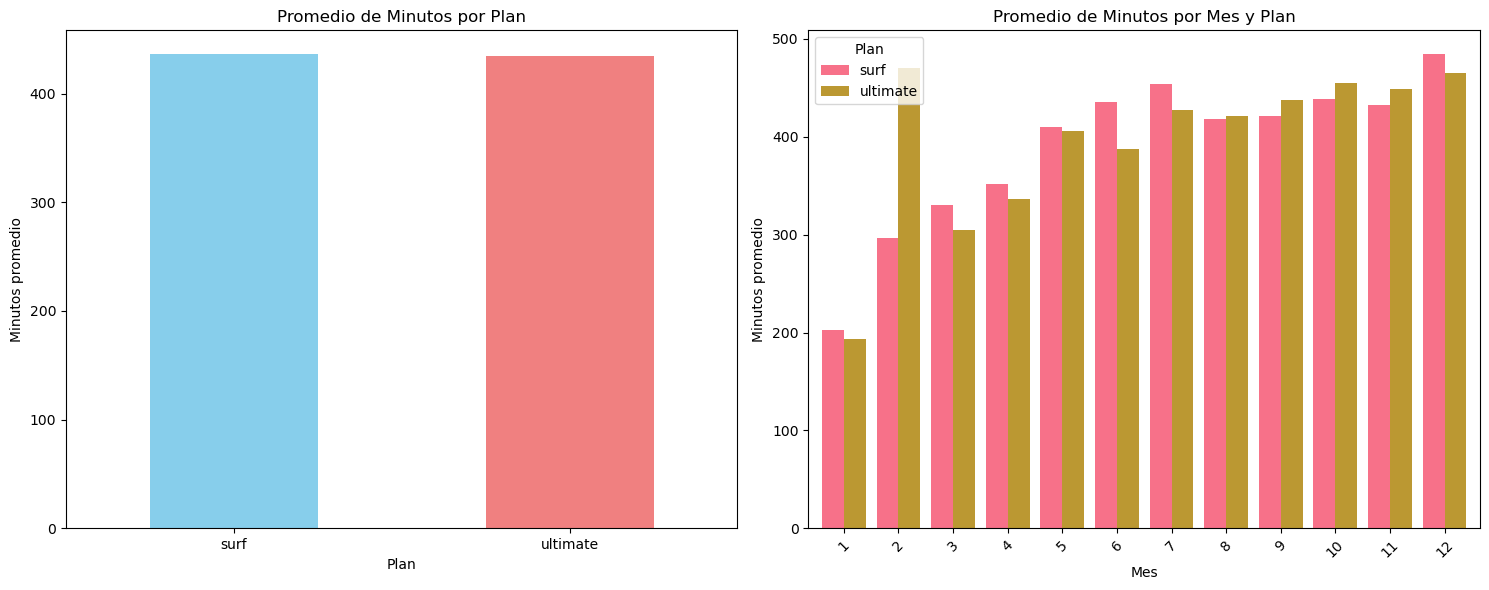

In [36]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
sns.set_palette("husl")

# Estadísticas por plan
call_stats_by_plan = user_monthly_data.groupby('plan')['minutes_used'].agg(['mean', 'median', 'std', 'min', 'max', 'count']).round(2)
print("=== ESTADÍSTICAS DE MINUTOS POR PLAN ===")
print(call_stats_by_plan)

# Gráfico de barras comparativo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Promedio por plan
avg_by_plan = user_monthly_data.groupby('plan')['minutes_used'].mean()
avg_by_plan.plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral'])
ax1.set_title('Promedio de Minutos por Plan')
ax1.set_ylabel('Minutos promedio')
ax1.set_xlabel('Plan')
ax1.tick_params(axis='x', rotation=0)

# Promedio por mes y plan
monthly_avg = user_monthly_data.groupby(['month', 'plan'])['minutes_used'].mean().unstack()
monthly_avg.plot(kind='bar', ax=ax2, width=0.8)
ax2.set_title('Promedio de Minutos por Mes y Plan')
ax2.set_ylabel('Minutos promedio')
ax2.set_xlabel('Mes')
ax2.legend(title='Plan')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

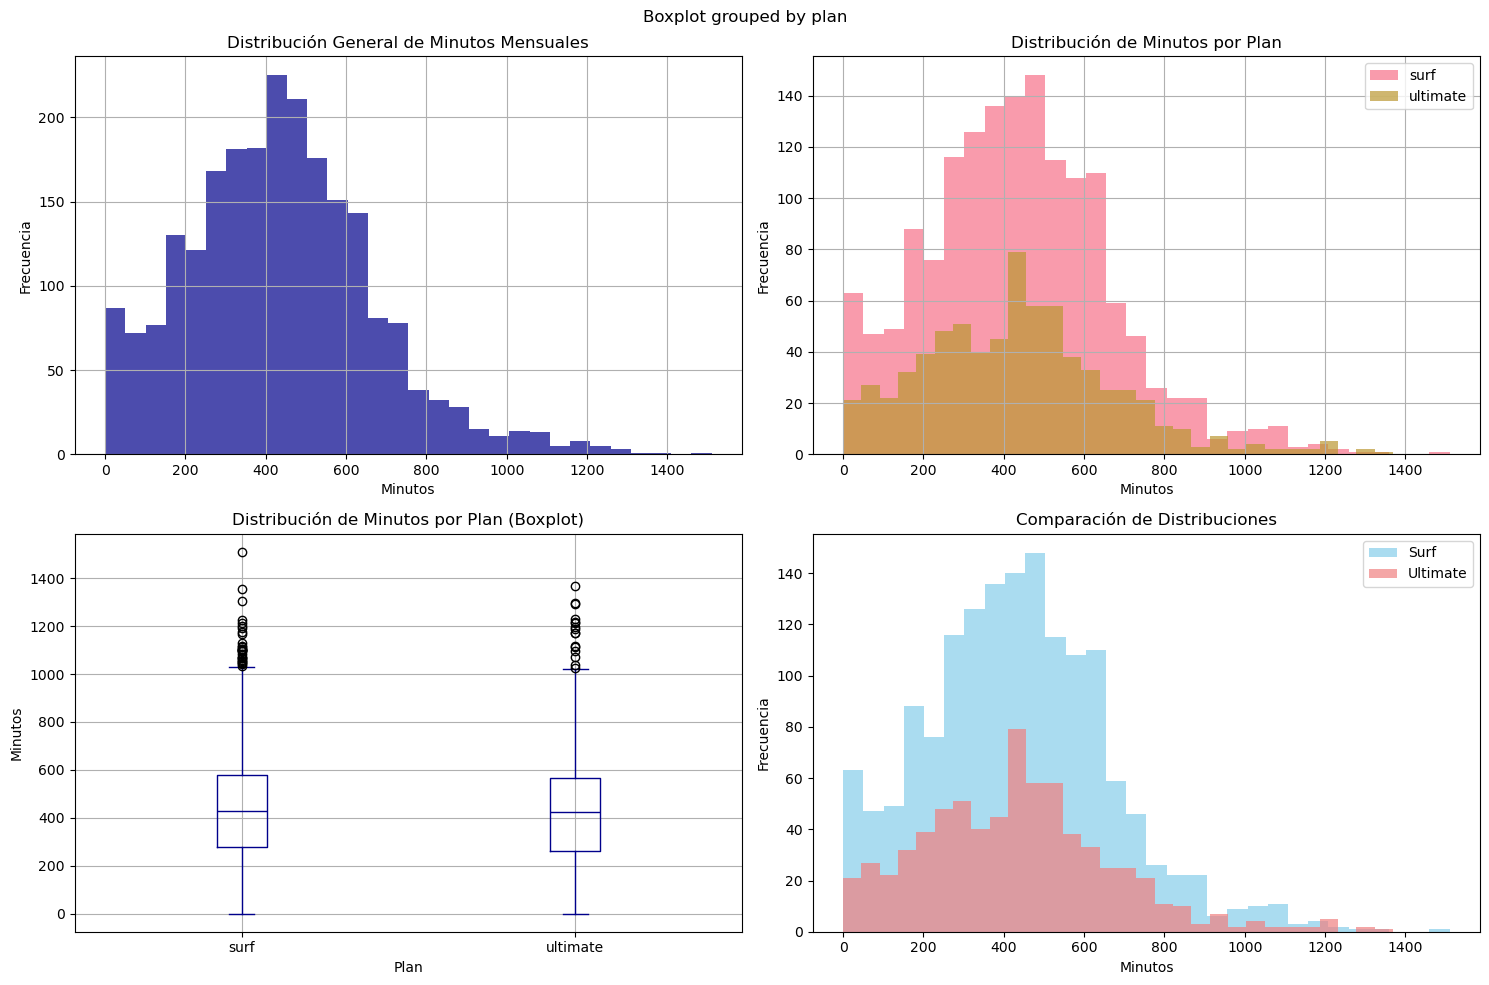

In [37]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histograma general
user_monthly_data['minutes_used'].hist(bins=30, ax=axes[0,0], alpha=0.7, color='darkblue')
axes[0,0].set_title('Distribución General de Minutos Mensuales')
axes[0,0].set_xlabel('Minutos')
axes[0,0].set_ylabel('Frecuencia')

# Histogramas por plan
for i, plan in enumerate(['surf', 'ultimate']):
    plan_data = user_monthly_data[user_monthly_data['plan'] == plan]['minutes_used']
    plan_data.hist(bins=30, ax=axes[0,1], alpha=0.7, label=plan)

axes[0,1].set_title('Distribución de Minutos por Plan')
axes[0,1].set_xlabel('Minutos')
axes[0,1].set_ylabel('Frecuencia')
axes[0,1].legend()

# Boxplot comparativo
user_monthly_data.boxplot(column='minutes_used', color='darkblue', by='plan', ax=axes[1,0])
axes[1,0].set_title('Distribución de Minutos por Plan (Boxplot)')
axes[1,0].set_xlabel('Plan')
axes[1,0].set_ylabel('Minutos')

# Histograma superpuesto
surf_data = user_monthly_data[user_monthly_data['plan'] == 'surf']['minutes_used']
ultimate_data = user_monthly_data[user_monthly_data['plan'] == 'ultimate']['minutes_used']

axes[1,1].hist(surf_data, bins=30, alpha=0.7, label='Surf', color='skyblue')
axes[1,1].hist(ultimate_data, bins=30, alpha=0.7, label='Ultimate', color='lightcoral')
axes[1,1].set_title('Comparación de Distribuciones')
axes[1,1].set_xlabel('Minutos')
axes[1,1].set_ylabel('Frecuencia')
axes[1,1].legend()

plt.tight_layout()
plt.show()


[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [38]:
# Calcula la media y la varianza de la duración mensual de llamadas.
print("=== ESTADÍSTICAS DETALLADAS DE MINUTOS POR PLAN ===")

for plan in ['surf', 'ultimate']:
    plan_data = user_monthly_data[user_monthly_data['plan'] == plan]['minutes_used']
    
    print(f"\n--- Plan {plan.upper()} ---")
    print(f"Media: {plan_data.mean():.2f} minutos")
    print(f"Mediana: {plan_data.median():.2f} minutos")
    print(f"Varianza: {plan_data.var():.2f}")
    print(f"Desviación estándar: {plan_data.std():.2f}")
    print(f"Mínimo: {plan_data.min():.2f} minutos")
    print(f"Máximo: {plan_data.max():.2f} minutos")
    print(f"Número de observaciones: {len(plan_data)}")

# Comparación estadística
print("\n=== COMPARACIÓN ENTRE PLANES ===")
surf_minutes = user_monthly_data[user_monthly_data['plan'] == 'surf']['minutes_used']
ultimate_minutes = user_monthly_data[user_monthly_data['plan'] == 'ultimate']['minutes_used']

print(f"Diferencia en media: {ultimate_minutes.mean() - surf_minutes.mean():.2f} minutos")
print(f"Diferencia en varianza: {ultimate_minutes.var() - surf_minutes.var():.2f}")


=== ESTADÍSTICAS DETALLADAS DE MINUTOS POR PLAN ===

--- Plan SURF ---
Media: 436.52 minutos
Mediana: 430.00 minutos
Varianza: 52571.06
Desviación estándar: 229.28
Mínimo: 0.00 minutos
Máximo: 1510.00 minutos
Número de observaciones: 1545

--- Plan ULTIMATE ---
Media: 434.68 minutos
Mediana: 425.00 minutos
Varianza: 56573.63
Desviación estándar: 237.85
Mínimo: 0.00 minutos
Máximo: 1369.00 minutos
Número de observaciones: 713

=== COMPARACIÓN ENTRE PLANES ===
Diferencia en media: -1.84 minutos
Diferencia en varianza: 4002.57


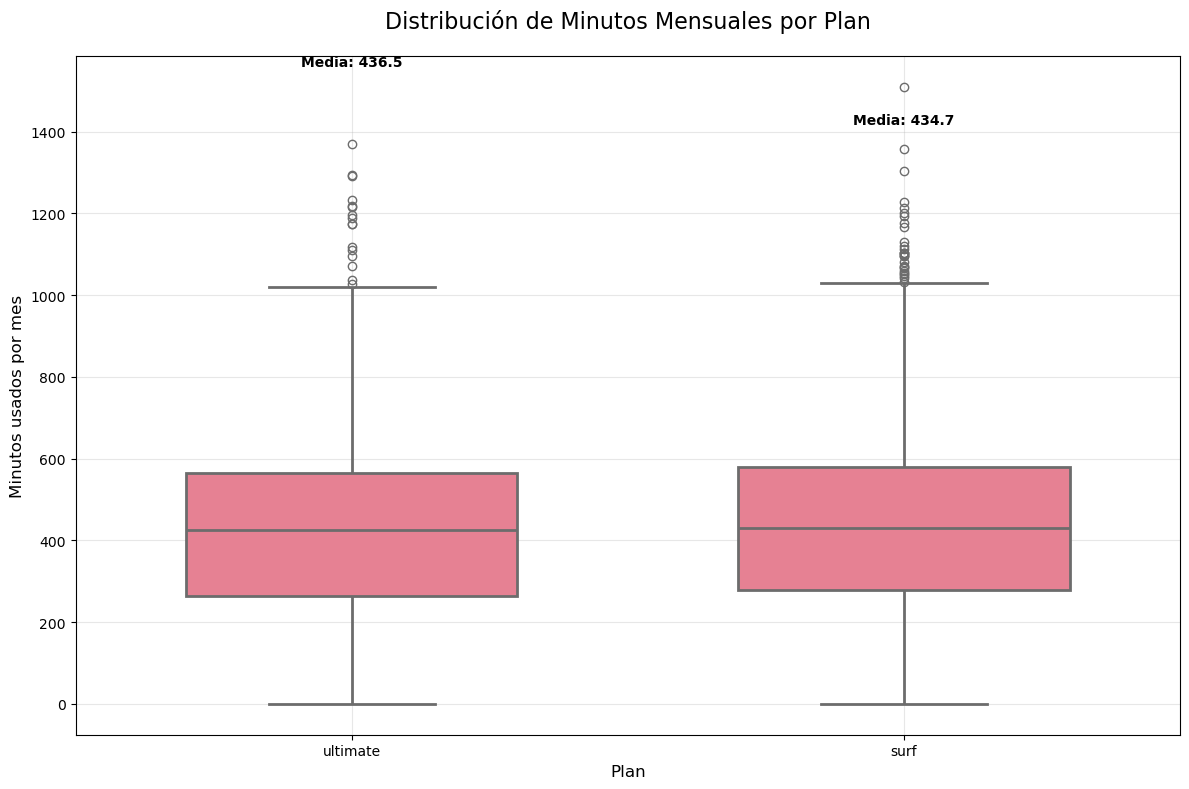

In [39]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.figure(figsize=(12, 8))

# Crear boxplot para mejor visualización
sns.boxplot(data=user_monthly_data, x='plan', y='minutes_used', 
           width=0.6, linewidth=2)

plt.title('Distribución de Minutos Mensuales por Plan', fontsize=16, pad=20)
plt.xlabel('Plan', fontsize=12)
plt.ylabel('Minutos usados por mes', fontsize=12)
plt.grid(True, alpha=0.3)

# Añadir estadísticas en el gráfico
for i, plan in enumerate(['surf', 'ultimate']):
    plan_data = user_monthly_data[user_monthly_data['plan'] == plan]['minutes_used']
    plt.text(i, plan_data.max() + 50, f'Media: {plan_data.mean():.1f}', 
             ha='center', fontsize=10, weight='bold')

plt.tight_layout()
plt.show()


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

Conclusiones:
1. Comportamiento similar:
* Los usuarios de ambos planes usan prácticamente la misma cantidad de minutos mensuales y en llamadas.
* Surf: 436.52 minutos promedio vs Ultimate: 434.68 minutos promedio.
* No hay evidencia de que el plan influya en el comportamiento de llamadas
* Diferencia mínima de solo -1.84 minutos entre planes.
  
2. Subutilización del plan Ultimate:
* Los usuarios Ultimate pagan por 3,000 minutos incluidos pero solo usan ~435 en promedio
* Esto sugiere que eligen Ultimate por otros beneficios (datos, mensajes)
* Plan Ultimate tiene mayor variabilidad (Varianza: 56,573 vs 52,571)

3. Adecuación del plan Surf:
* Con 500 minutos incluidos y uso promedio de 436, la mayoría no paga excesos
* El plan Surf parece bien dimensionado para las necesidades reales

4. Variabilidad similar:
* Ambos planes muestran desviaciones estándar altas (~230 minutos)
* Indica gran diversidad en patrones de uso 
* Rango amplio de uso: desde 0 hasta ~1,500 minutos mensuales

5. Distribución:
* Distribuciones aproximadamente normales para ambos planes
* Medianas muy cercanas (430 vs 425 minutos)
* No hay diferencias significativas en patrones de uso

6. Implicaciones Comerciales:
* Los usuarios NO eligen el plan basándose en necesidades de minutos
* El límite de 500 min (Surf) vs 3000 min (Ultimate) no refleja uso real
* La mayoría de usuarios Surf no exceden su límite incluido

### Mensajes

=== ESTADÍSTICAS DE MENSAJES POR PLAN ===
           mean  median    std  min    max  count
plan                                             
surf      30.90    24.0  33.64  0.0  266.0   1545
ultimate  37.73    30.0  34.79  0.0  166.0    713


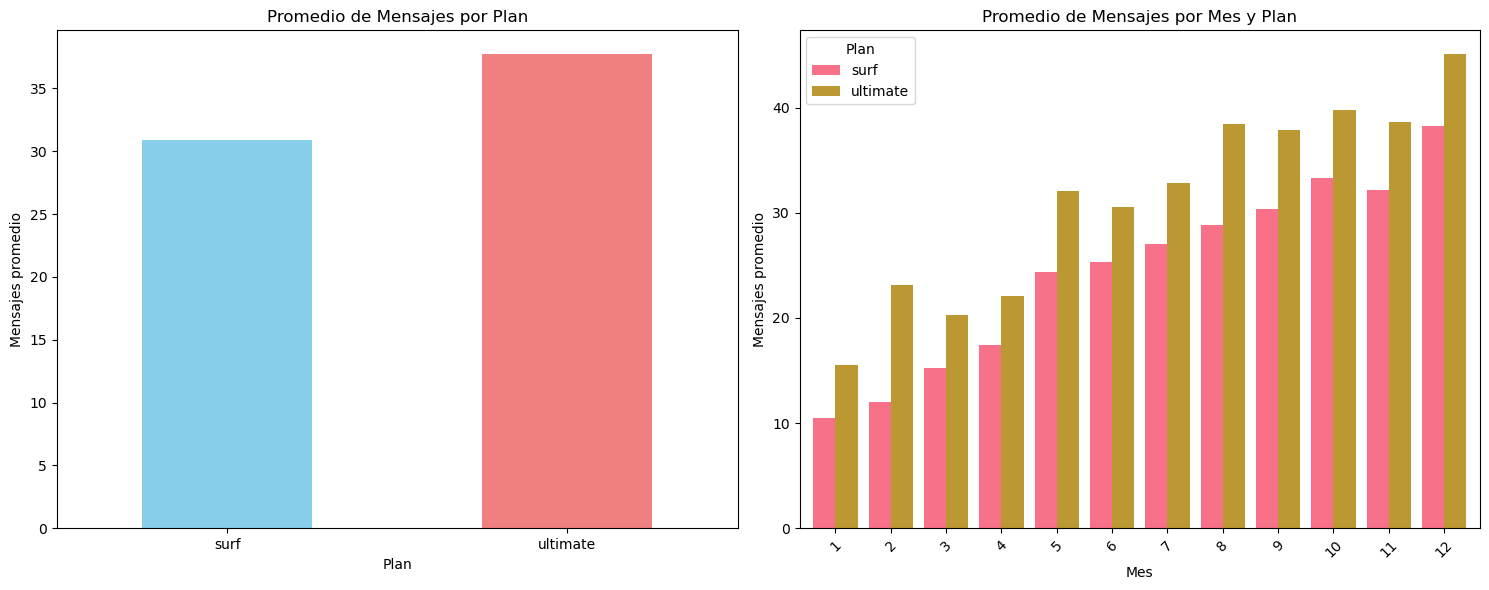

In [40]:
# Compara la duración promedio de mensajes por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')
sns.set_palette("husl")

# Estadísticas por plan 
messages_stats_by_plan = user_monthly_data.groupby('plan')['messages_count'].agg(['mean', 'median', 'std', 'min', 'max', 'count']).round(2)
print("=== ESTADÍSTICAS DE MENSAJES POR PLAN ===")
print(messages_stats_by_plan)

# Gráfico de barras comparativo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Promedio por plan 
avg_by_plan = user_monthly_data.groupby('plan')['messages_count'].mean()
avg_by_plan.plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral'])
ax1.set_title('Promedio de Mensajes por Plan')
ax1.set_ylabel('Mensajes promedio')
ax1.set_xlabel('Plan')
ax1.tick_params(axis='x', rotation=0)

# Promedio por mes y plan 
monthly_avg = user_monthly_data.groupby(['month', 'plan'])['messages_count'].mean().unstack()
monthly_avg.plot(kind='bar', ax=ax2, width=0.8)
ax2.set_title('Promedio de Mensajes por Mes y Plan')
ax2.set_ylabel('Mensajes promedio') 
ax2.set_xlabel('Mes')
ax2.legend(title='Plan')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

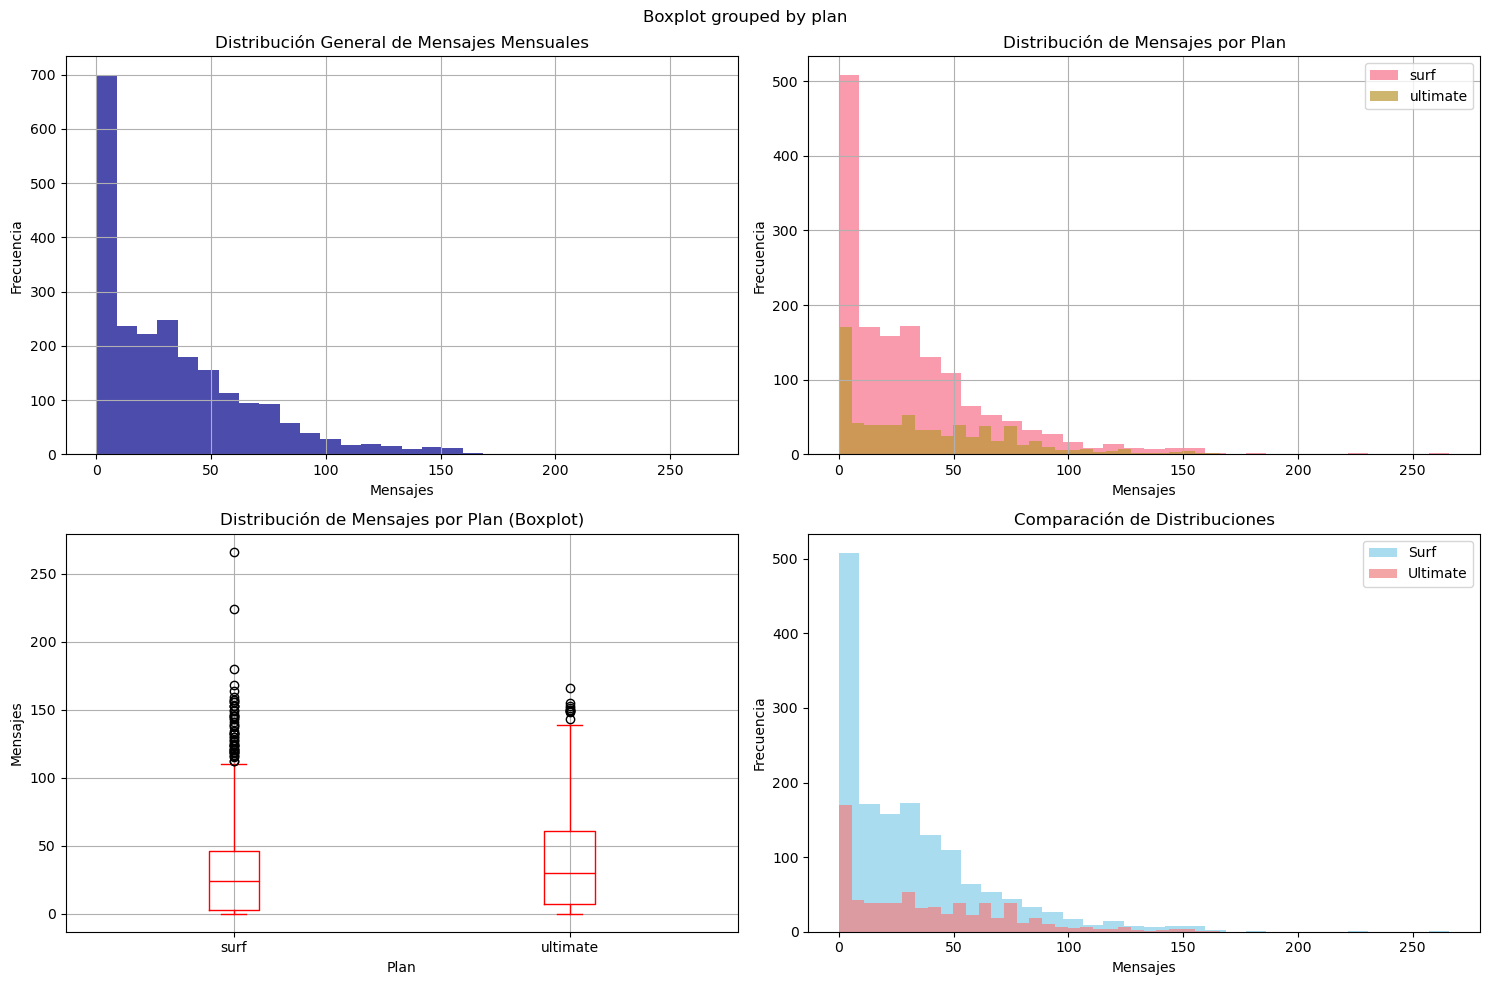

In [41]:
# Compara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histograma general
user_monthly_data['messages_count'].hist(bins=30, ax=axes[0,0], alpha=0.7, color='darkblue')
axes[0,0].set_title('Distribución General de Mensajes Mensuales')
axes[0,0].set_xlabel('Mensajes')
axes[0,0].set_ylabel('Frecuencia')

# Histogramas por plan
for i, plan in enumerate(['surf', 'ultimate']):
    plan_data = user_monthly_data[user_monthly_data['plan'] == plan]['messages_count']
    plan_data.hist(bins=30, ax=axes[0,1], alpha=0.7, label=plan)

axes[0,1].set_title('Distribución de Mensajes por Plan')
axes[0,1].set_xlabel('Mensajes')
axes[0,1].set_ylabel('Frecuencia')
axes[0,1].legend()

# Boxplot comparativo
user_monthly_data.boxplot(column='messages_count', by='plan', ax=axes[1,0], color='red')
axes[1,0].set_title('Distribución de Mensajes por Plan (Boxplot)')
axes[1,0].set_xlabel('Plan')
axes[1,0].set_ylabel('Mensajes')

# Histograma superpuesto
surf_data = user_monthly_data[user_monthly_data['plan'] == 'surf']['messages_count']
ultimate_data = user_monthly_data[user_monthly_data['plan'] == 'ultimate']['messages_count']

axes[1,1].hist(surf_data, bins=30, alpha=0.7, label='Surf', color='skyblue')
axes[1,1].hist(ultimate_data, bins=30, alpha=0.7, label='Ultimate', color='lightcoral')
axes[1,1].set_title('Comparación de Distribuciones')
axes[1,1].set_xlabel('Mensajes')
axes[1,1].set_ylabel('Frecuencia')
axes[1,1].legend()

plt.tight_layout()
plt.show()

In [42]:
# Calcula la media y la varianza de la duración mensual de mensajes.
print("=== ESTADÍSTICAS DETALLADAS DE MENSAJES POR PLAN ===")

for plan in ['surf', 'ultimate']:
    plan_data = user_monthly_data[user_monthly_data['plan'] == plan]['messages_count']
    
    print(f"\n--- Plan {plan.upper()} ---")
    print(f"Media: {plan_data.mean():.2f} mensajes")
    print(f"Mediana: {plan_data.median():.2f} mensajes")
    print(f"Varianza: {plan_data.var():.2f}")
    print(f"Desviación estándar: {plan_data.std():.2f}")
    print(f"Mínimo: {plan_data.min():.2f} mensajes")
    print(f"Máximo: {plan_data.max():.2f} mensajes")
    print(f"Número de observaciones: {len(plan_data)}")

# Comparación estadística
print("\n=== COMPARACIÓN ENTRE PLANES ===")
surf_messages = user_monthly_data[user_monthly_data['plan'] == 'surf']['messages_count']
ultimate_messages = user_monthly_data[user_monthly_data['plan'] == 'ultimate']['messages_count']

print(f"Diferencia en media: {ultimate_messages.mean() - surf_messages.mean():.2f} mensajes")
print(f"Diferencia en varianza: {ultimate_messages.var() - surf_messages.var():.2f}")


=== ESTADÍSTICAS DETALLADAS DE MENSAJES POR PLAN ===

--- Plan SURF ---
Media: 30.90 mensajes
Mediana: 24.00 mensajes
Varianza: 1131.95
Desviación estándar: 33.64
Mínimo: 0.00 mensajes
Máximo: 266.00 mensajes
Número de observaciones: 1545

--- Plan ULTIMATE ---
Media: 37.73 mensajes
Mediana: 30.00 mensajes
Varianza: 1210.14
Desviación estándar: 34.79
Mínimo: 0.00 mensajes
Máximo: 166.00 mensajes
Número de observaciones: 713

=== COMPARACIÓN ENTRE PLANES ===
Diferencia en media: 6.83 mensajes
Diferencia en varianza: 78.19


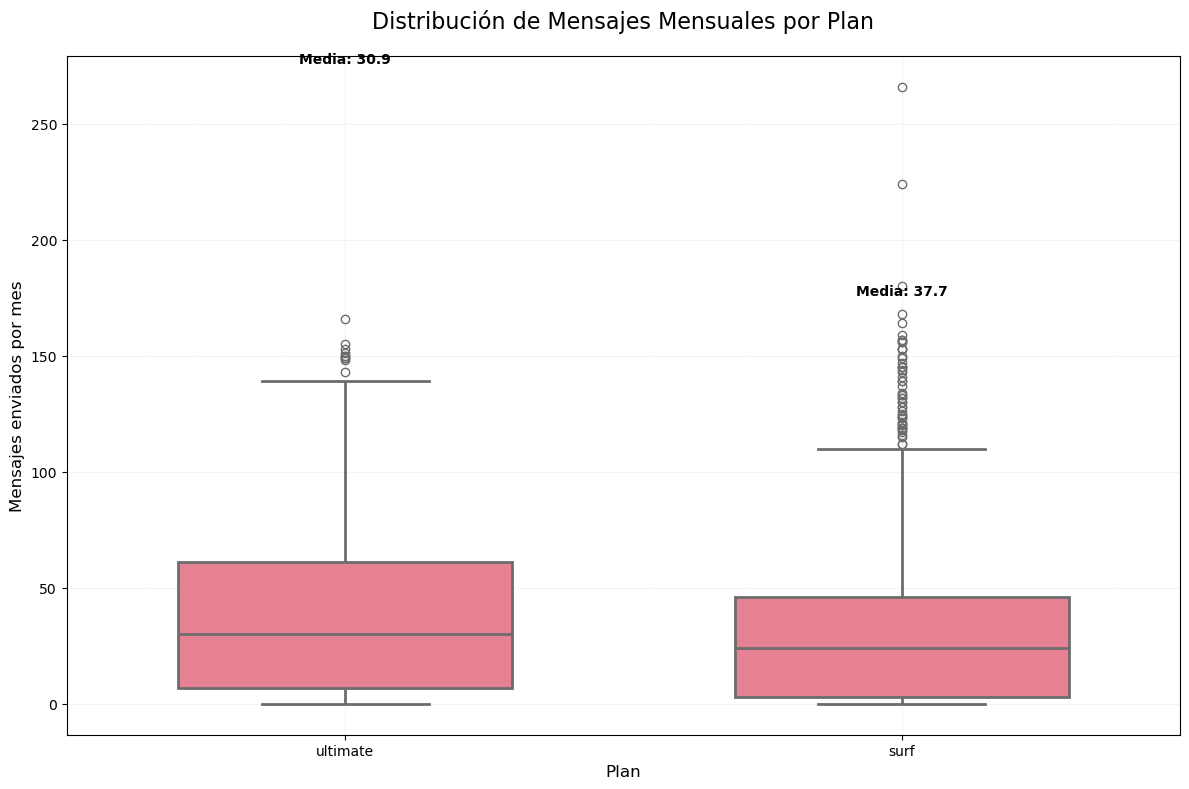

In [43]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de mensajes
plt.figure(figsize=(12, 8))

sns.boxplot(data=user_monthly_data, x='plan', y='messages_count', 
            width=0.6, linewidth=2)
plt.title('Distribución de Mensajes Mensuales por Plan', fontsize=16, pad=20)
plt.xlabel('Plan', fontsize=12)
plt.ylabel('Mensajes enviados por mes', fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)

# Añadir estadísticas
for i, plan in enumerate(['surf', 'ultimate']):
    plan_data = user_monthly_data[user_monthly_data['plan'] == plan]['messages_count']
    plt.text(i, plan_data.max() + 10, f'Media: {plan_data.mean():.1f}',
             ha='center', fontsize=10, weight='bold')

plt.tight_layout()
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

Conclusiones:

1. Diferencia significativa entre planes:
* Los usuarios Ultimate envían 22% más mensajes que los usuarios Surf
* Ultimate: 37.73 mensajes promedio vs Surf: 30.90 mensajes promedio
* Diferencia de +6.83 mensajes mensuales

2. Subutilización masiva de límites incluidos:
* Plan Surf: 50 mensajes incluidos, uso promedio 30.90 (38% de subutilización)
* Plan Ultimate: 1000 mensajes incluidos, uso promedio 37.73 (96% de subutilización)
* La mayoría de usuarios no pagan excesos por mensajes

3. Patrones de comportamiento:
* Los usuarios Ultimate son más activos en mensajería
* Ambos planes muestran alta variabilidad (desviación ~34 mensajes)
* Distribución sesgada hacia valores bajos (mediana < media)

4. Implicaciones comerciales:
* El límite de 50 mensajes (Surf) está bien dimensionado
* El límite de 1000 mensajes (Ultimate) es excesivo para el uso real
* Los usuarios Ultimate no eligen el plan por necesidades de mensajería

5. Diferencia notable entre planes:
* Ultimate: 37.73 mensajes promedio vs Surf: 30.90 mensajes promedio
* Diferencia de +6.83 mensajes mensuales a favor de Ultimate
* Los usuarios Ultimate envían 22% más mensajes que Surf

6. Variabilidad similar:
* Ambos planes tienen desviaciones estándar similares (~34 mensajes)
* Ultimate tiene ligeramente más variabilidad
* Rango amplio: desde 0 hasta 266 mensajes (Surf) y 166 (Ultimate)

7. Utilización de límites:
* Surf: 50 mensajes incluidos, uso promedio 30.90 (subutilización)
* Ultimate: 1000 mensajes incluidos, uso promedio 37.73 (gran subutilización)
* La mayoría de usuarios no exceden los límites incluidos


### Internet

=== ESTADÍSTICAS DE INTERNET (GB) POR PLAN ===
           mean  median   std   min    max  count
plan                                             
surf      16.12   16.44  7.66  0.00  69.27   1545
ultimate  16.87   16.47  7.58  0.28  45.50    713


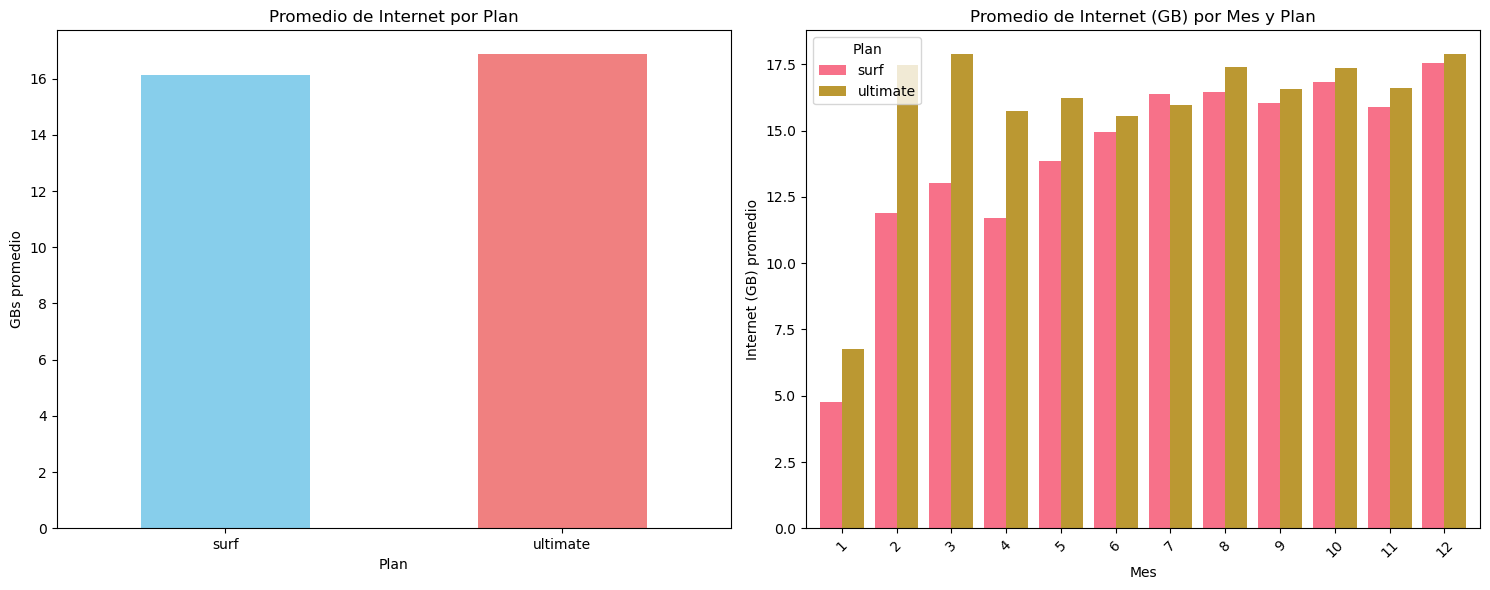

In [44]:
# Compara la duración promedio de internet por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')
sns.set_palette("husl")

# Estadísticas por plan 
messages_stats_by_plan = user_monthly_data.groupby('plan')['gb_used_total'].agg(['mean', 'median', 'std', 'min', 'max', 'count']).round(2)
print("=== ESTADÍSTICAS DE INTERNET (GB) POR PLAN ===")
print(messages_stats_by_plan)

# Gráfico de barras comparativo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Promedio por plan
avg_by_plan = user_monthly_data.groupby('plan')['gb_used_total'].mean()
avg_by_plan.plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral'])
ax1.set_title('Promedio de Internet por Plan')
ax1.set_ylabel('GBs promedio')
ax1.set_xlabel('Plan')
ax1.tick_params(axis='x', rotation=0)

# Promedio por mes y plan 
monthly_avg = user_monthly_data.groupby(['month', 'plan'])['gb_used_total'].mean().unstack()
monthly_avg.plot(kind='bar', ax=ax2, width=0.8)
ax2.set_title('Promedio de Internet (GB) por Mes y Plan')
ax2.set_ylabel('Internet (GB) promedio')  
ax2.set_xlabel('Mes')
ax2.legend(title='Plan')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

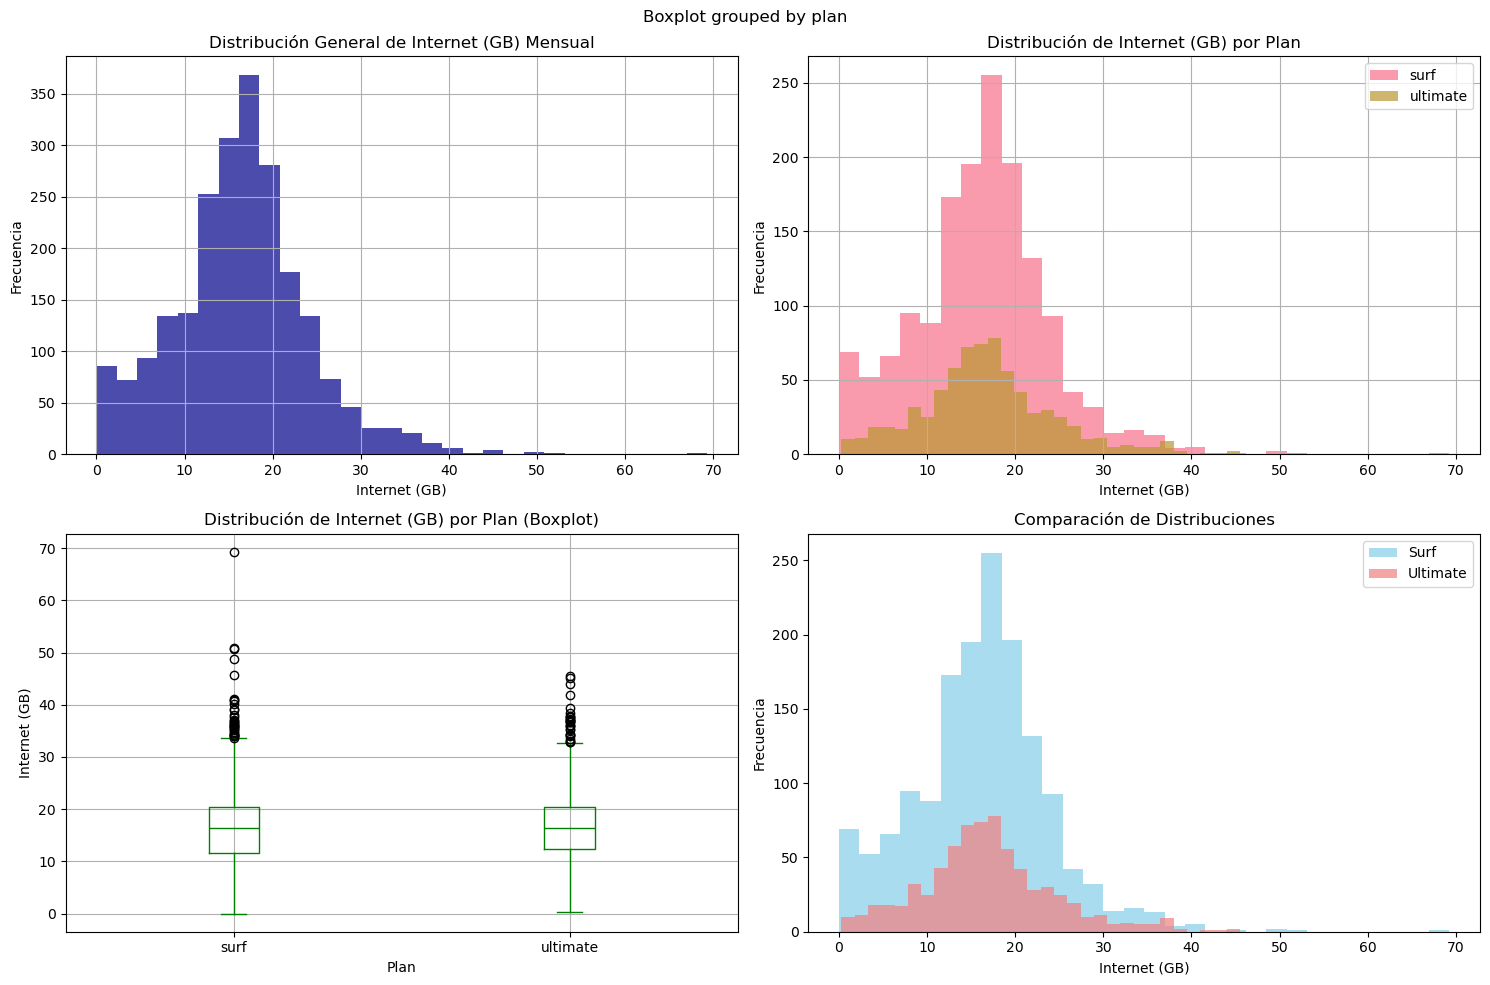

In [45]:
# Compara la cantidad de internet mensual que necesitan los usuarios de cada plan. Traza un histograma.
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histograma general
user_monthly_data['gb_used_total'].hist(bins=30, ax=axes[0,0], alpha=0.7, color='darkblue')
axes[0,0].set_title('Distribución General de Internet (GB) Mensual')
axes[0,0].set_xlabel('Internet (GB)')
axes[0,0].set_ylabel('Frecuencia')

# Histogramas por plan
for i, plan in enumerate(['surf', 'ultimate']):
    plan_data = user_monthly_data[user_monthly_data['plan'] == plan]['gb_used_total']
    plan_data.hist(bins=30, ax=axes[0,1], alpha=0.7, label=plan)

axes[0,1].set_title('Distribución de Internet (GB) por Plan')
axes[0,1].set_xlabel('Internet (GB)')
axes[0,1].set_ylabel('Frecuencia')
axes[0,1].legend()

# Boxplot comparativo
user_monthly_data.boxplot(column='gb_used_total', by='plan', ax=axes[1,0], color='green')
axes[1,0].set_title('Distribución de Internet (GB) por Plan (Boxplot)')
axes[1,0].set_xlabel('Plan')
axes[1,0].set_ylabel('Internet (GB)')

# Histograma superpuesto
surf_data = user_monthly_data[user_monthly_data['plan'] == 'surf']['gb_used_total']
ultimate_data = user_monthly_data[user_monthly_data['plan'] == 'ultimate']['gb_used_total']

axes[1,1].hist(surf_data, bins=30, alpha=0.7, label='Surf', color='skyblue')
axes[1,1].hist(ultimate_data, bins=30, alpha=0.7, label='Ultimate', color='lightcoral')
axes[1,1].set_title('Comparación de Distribuciones')
axes[1,1].set_xlabel('Internet (GB)')
axes[1,1].set_ylabel('Frecuencia')
axes[1,1].legend()

plt.tight_layout()
plt.show()

In [46]:
# Calcula la media y la varianza de la duración mensual de internet.
print("=== ESTADÍSTICAS DETALLADAS DE INTERNET (GB) POR PLAN ===")

for plan in ['surf', 'ultimate']:
    plan_data = user_monthly_data[user_monthly_data['plan'] == plan]['gb_used_total']
    
    print(f"\n--- Plan {plan.upper()} ---")
    print(f"Media: {plan_data.mean():.2f} internet en GB")
    print(f"Mediana: {plan_data.median():.2f} internet en GB")
    print(f"Varianza: {plan_data.var():.2f}")
    print(f"Desviación estándar: {plan_data.std():.2f}")
    print(f"Mínimo: {plan_data.min():.2f} internet en GB")
    print(f"Máximo: {plan_data.max():.2f} internet en GB")
    print(f"Número de observaciones: {len(plan_data)}")

# Comparación estadística
print("\n=== COMPARACIÓN ENTRE PLANES ===")
surf_data = user_monthly_data[user_monthly_data['plan'] == 'surf']['gb_used_total']
ultimate_data = user_monthly_data[user_monthly_data['plan'] == 'ultimate']['gb_used_total']

print(f"Diferencia en media: {ultimate_data.mean() - surf_data.mean():.2f} internet en GB")
print(f"Diferencia en varianza: {ultimate_data.var() - surf_data.var():.2f}")


=== ESTADÍSTICAS DETALLADAS DE INTERNET (GB) POR PLAN ===

--- Plan SURF ---
Media: 16.12 internet en GB
Mediana: 16.44 internet en GB
Varianza: 58.74
Desviación estándar: 7.66
Mínimo: 0.00 internet en GB
Máximo: 69.27 internet en GB
Número de observaciones: 1545

--- Plan ULTIMATE ---
Media: 16.87 internet en GB
Mediana: 16.47 internet en GB
Varianza: 57.42
Desviación estándar: 7.58
Mínimo: 0.28 internet en GB
Máximo: 45.50 internet en GB
Número de observaciones: 713

=== COMPARACIÓN ENTRE PLANES ===
Diferencia en media: 0.75 internet en GB
Diferencia en varianza: -1.31


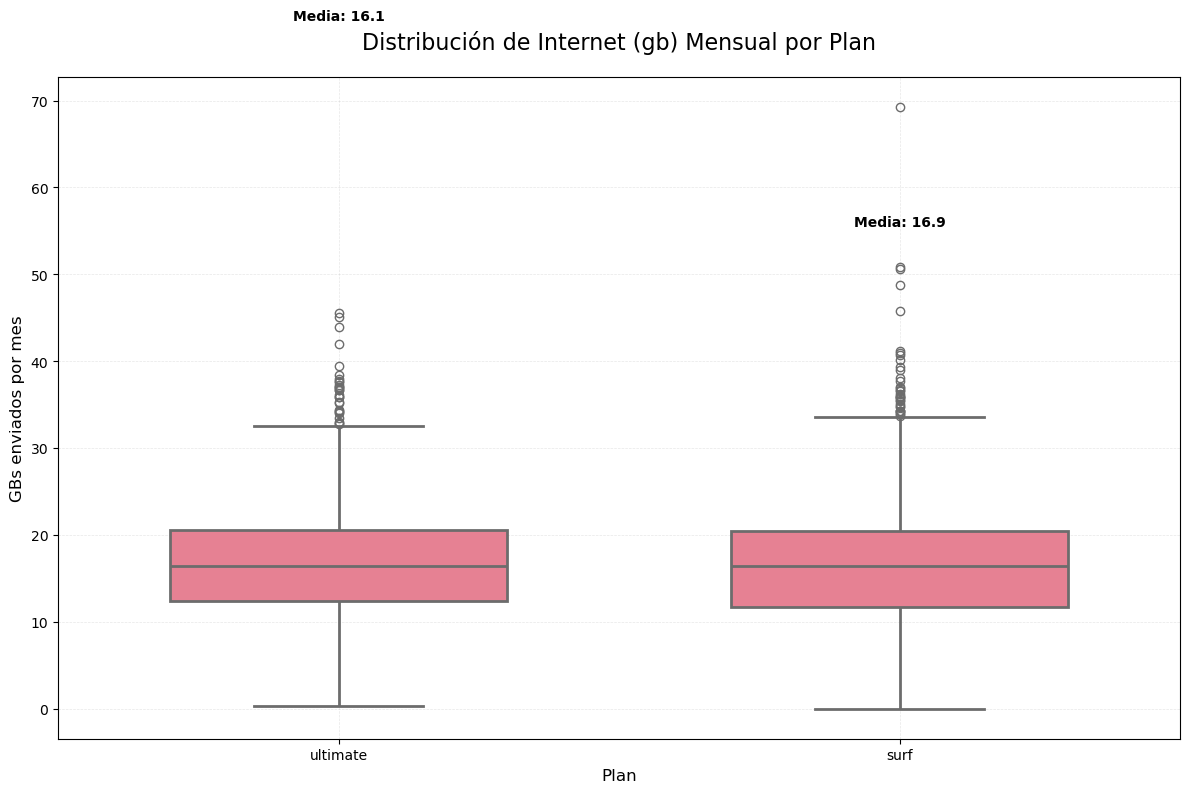

In [47]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de Internet
plt.figure(figsize=(12, 8))

sns.boxplot(data=user_monthly_data, x='plan', y='gb_used_total', 
            width=0.6, linewidth=2)
plt.title('Distribución de Internet (gb) Mensual por Plan', fontsize=16, pad=20)
plt.xlabel('Plan', fontsize=12)
plt.ylabel('GBs enviados por mes', fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)

# Añadir estadísticas
for i, plan in enumerate(['surf', 'ultimate']):
    plan_data = user_monthly_data[user_monthly_data['plan'] == plan]['gb_used_total']
    plt.text(i, plan_data.max() + 10, f'Media: {plan_data.mean():.1f}',
             ha='center', fontsize=10, weight='bold')

plt.tight_layout()
plt.show()

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

Conclusiones:

1. Comportamiento muy similar entre planes:
* Diferencia mínima: Ultimate usa solo 0.75 GB más que Surf mensualmente
* Ultimate: 16.87 GB promedio vs Surf: 16.12 GB promedio
* Diferencia de apenas 4.7% entre planes
  
2. Uso eficiente de límites incluidos:
* Plan Surf: 15 GB incluidos, uso promedio 16.12 GB (ligero exceso)
* Plan Ultimate: 30 GB incluidos, uso promedio 16.87 GB (44% de subutilización)
* Los usuarios Surf ocasionalmente pagan excesos, los usuarios de Ultimate no

3. Patrones de consumo consistentes:
* Medianas prácticamente idénticas (16.44 vs 16.47 GB)
* Variabilidad similar (desviación ~7.6 GB en ambos)
* Distribución normal en ambos planes

4. Implicaciones sobre elección de plan:
* Los usuarios NO eligen Ultimate por necesidades de datos
* El límite de 15 GB (Surf) está bien ajustado al uso real
* El límite de 30 GB (Ultimate) es generoso pero subutilizado

5. Comportamiento homogéneo:
* Ambos grupos de usuarios tienen patrones de consumo similares
* No hay diferencias significativas en el uso de Internet
* La elección de plan no refleja necesidades de datos

6. Eficiencia comercial:
* Surf genera ingresos adicionales por excesos ocasionales
* Ultimate ofrece tranquilidad con límite generoso
* El consumo real es independiente del plan elegido


## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

=== ESTADÍSTICAS DE INGRESOS POR PLAN ===
           mean  median    std   min     max  count
plan                                               
surf      57.08   37.52  51.96  20.0  583.06   1545
ultimate  72.08   70.00  10.72  70.0  178.52    713


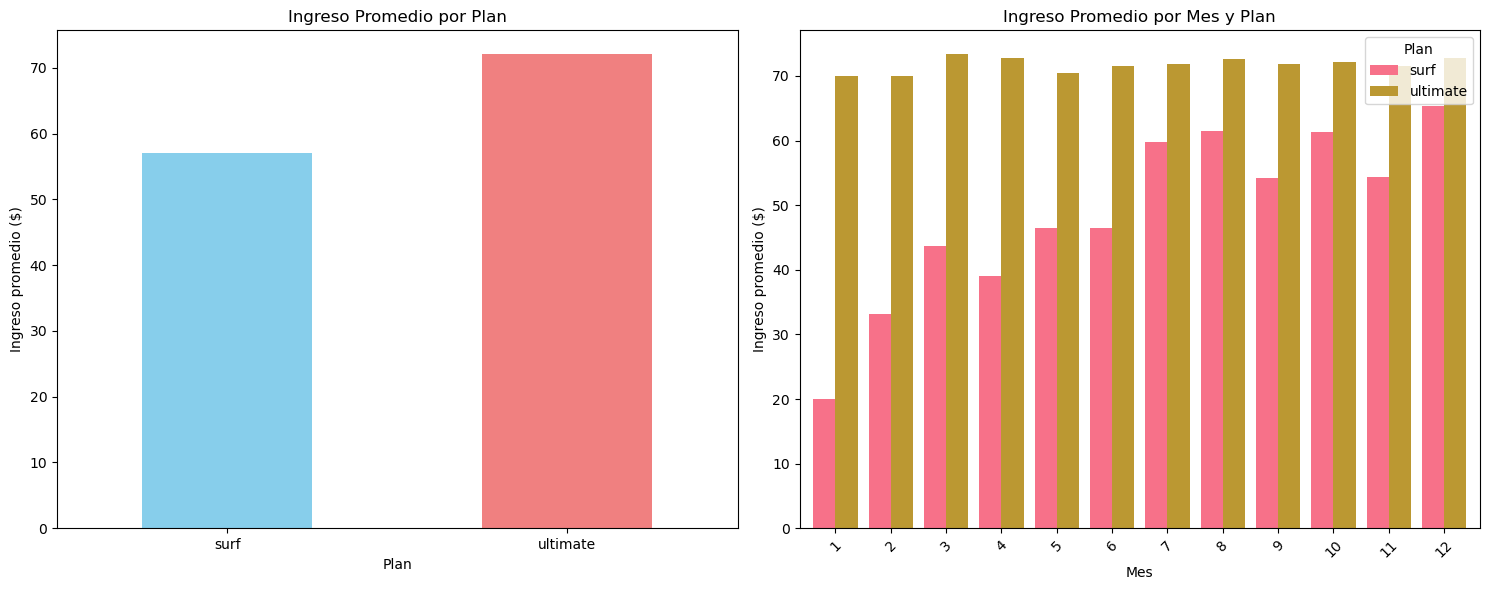

In [48]:
# Compara los ingresos promedio por cada plan y por cada mes
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')
sns.set_palette("husl")

# Estadísticas por plan
revenue_stats_by_plan = user_monthly_data.groupby('plan')['monthly_revenue'].agg(['mean', 'median', 'std', 'min', 'max', 'count']).round(2)
print("=== ESTADÍSTICAS DE INGRESOS POR PLAN ===")
print(revenue_stats_by_plan)

# Gráfico de barras comparativo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Promedio por plan
avg_by_plan = user_monthly_data.groupby('plan')['monthly_revenue'].mean()
avg_by_plan.plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral'])
ax1.set_title('Ingreso Promedio por Plan')
ax1.set_ylabel('Ingreso promedio ($)')
ax1.set_xlabel('Plan')
ax1.tick_params(axis='x', rotation=0)

# Promedio por mes y plan
monthly_avg = user_monthly_data.groupby(['month', 'plan'])['monthly_revenue'].mean().unstack()
monthly_avg.plot(kind='bar', ax=ax2, width=0.8)
ax2.set_title('Ingreso Promedio por Mes y Plan')
ax2.set_ylabel('Ingreso promedio ($)')
ax2.set_xlabel('Mes')
ax2.legend(title='Plan')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

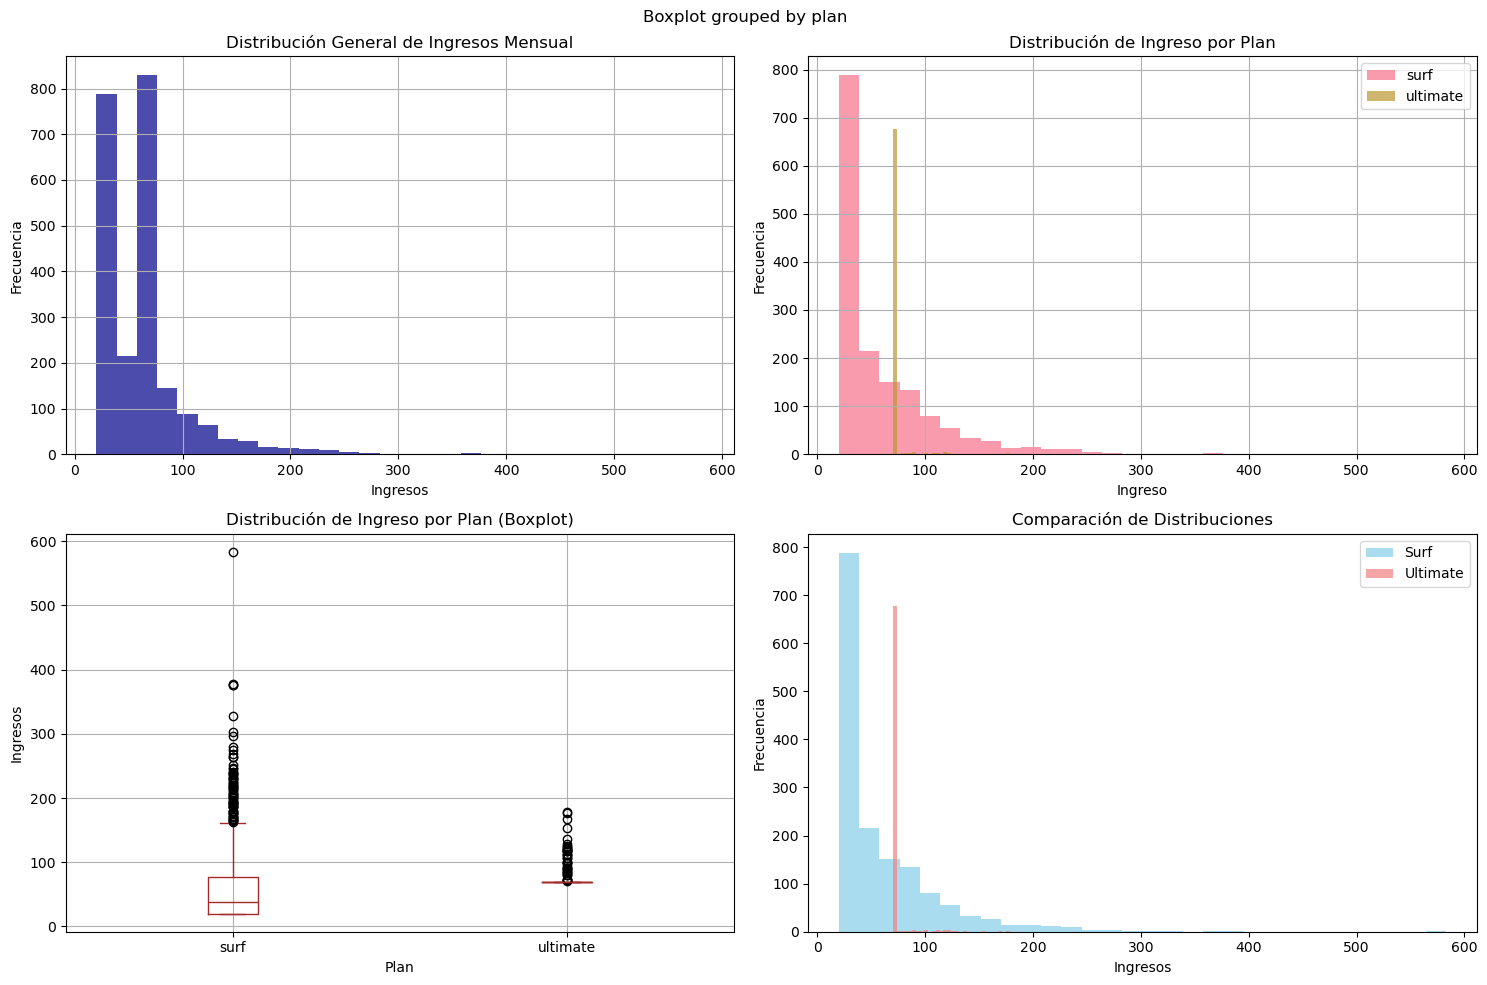

In [49]:
# Compara el ingreso mensual que necesitan los usuarios de cada plan. Traza un histograma.
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histograma general
user_monthly_data['monthly_revenue'].hist(bins=30, ax=axes[0,0], alpha=0.7, color='darkblue')
axes[0,0].set_title('Distribución General de Ingresos Mensual')
axes[0,0].set_xlabel('Ingresos')
axes[0,0].set_ylabel('Frecuencia')

# Histogramas por plan
for i, plan in enumerate(['surf', 'ultimate']):
    plan_data = user_monthly_data[user_monthly_data['plan'] == plan]['monthly_revenue']
    plan_data.hist(bins=30, ax=axes[0,1], alpha=0.7, label=plan)
axes[0,1].set_title('Distribución de Ingreso por Plan')
axes[0,1].set_xlabel('Ingreso')
axes[0,1].set_ylabel('Frecuencia')
axes[0,1].legend()

# Boxplot comparativo
user_monthly_data.boxplot(column='monthly_revenue', by='plan', ax=axes[1,0], color='brown')
axes[1,0].set_title('Distribución de Ingreso por Plan (Boxplot)')
axes[1,0].set_xlabel('Plan')
axes[1,0].set_ylabel('Ingresos')

# Histograma superpuesto
surf_data = user_monthly_data[user_monthly_data['plan'] == 'surf']['monthly_revenue']
ultimate_data = user_monthly_data[user_monthly_data['plan'] == 'ultimate']['monthly_revenue']
axes[1,1].hist(surf_data, bins=30, alpha=0.7, label='Surf', color='skyblue')
axes[1,1].hist(ultimate_data, bins=30, alpha=0.7, label='Ultimate', color='lightcoral')
axes[1,1].set_title('Comparación de Distribuciones')
axes[1,1].set_xlabel('Ingresos')
axes[1,1].set_ylabel('Frecuencia')
axes[1,1].legend()

plt.tight_layout()
plt.show()

In [50]:
# Calcula la media y la varianza de la duración mensual de ingresos.
print("=== ESTADÍSTICAS DETALLADAS DE INGRESOS POR PLAN ===")

for plan in ['surf', 'ultimate']:
    plan_data = user_monthly_data[user_monthly_data['plan'] == plan]['monthly_revenue']
    
    print(f"\n--- Plan {plan.upper()} ---")
    print(f"Media: {plan_data.mean():.2f} ingresos")
    print(f"Mediana: {plan_data.median():.2f} ingresos")
    print(f"Varianza: {plan_data.var():.2f}")
    print(f"Desviación estándar: {plan_data.std():.2f}")
    print(f"Mínimo: {plan_data.min():.2f} ingresos")
    print(f"Máximo: {plan_data.max():.2f} ingresos")
    print(f"Número de observaciones: {len(plan_data)}")

# Comparación estadística
print("\n=== COMPARACIÓN ENTRE PLANES ===")
surf_data = user_monthly_data[user_monthly_data['plan'] == 'surf']['monthly_revenue']
ultimate_data = user_monthly_data[user_monthly_data['plan'] == 'ultimate']['monthly_revenue']

print(f"Diferencia en media: {ultimate_data.mean() - surf_data.mean():.2f} ingresos")
print(f"Diferencia en varianza: {ultimate_data.var() - surf_data.var():.2f}")


=== ESTADÍSTICAS DETALLADAS DE INGRESOS POR PLAN ===

--- Plan SURF ---
Media: 57.08 ingresos
Mediana: 37.52 ingresos
Varianza: 2700.28
Desviación estándar: 51.96
Mínimo: 20.00 ingresos
Máximo: 583.06 ingresos
Número de observaciones: 1545

--- Plan ULTIMATE ---
Media: 72.08 ingresos
Mediana: 70.00 ingresos
Varianza: 114.94
Desviación estándar: 10.72
Mínimo: 70.00 ingresos
Máximo: 178.52 ingresos
Número de observaciones: 713

=== COMPARACIÓN ENTRE PLANES ===
Diferencia en media: 15.00 ingresos
Diferencia en varianza: -2585.34


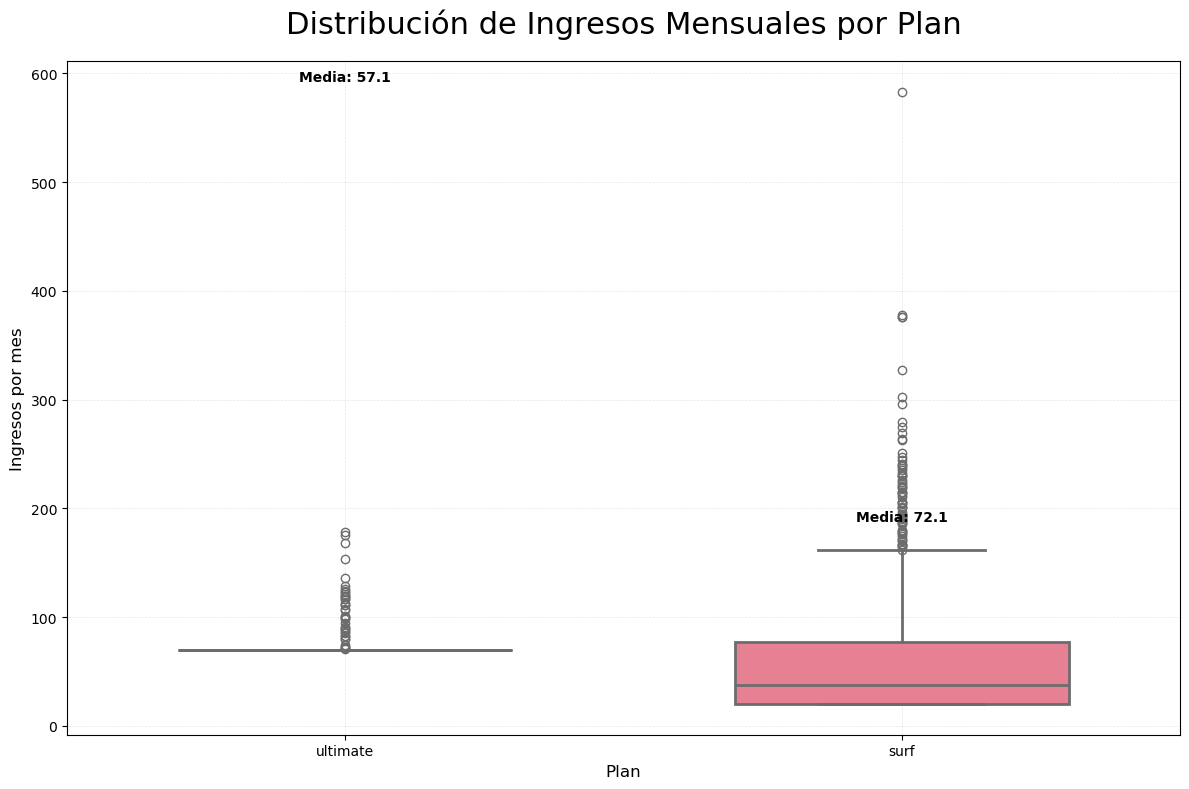

In [51]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de ingresos.
plt.figure(figsize=(12, 8))

sns.boxplot(data=user_monthly_data, x='plan', y='monthly_revenue', 
            width=0.6, linewidth=2)
plt.title('Distribución de Ingresos Mensuales por Plan', fontsize=22, pad=20)
plt.xlabel('Plan', fontsize=12)
plt.ylabel('Ingresos por mes', fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)

# Añadir estadísticas
for i, plan in enumerate(['surf', 'ultimate']):
    plan_data = user_monthly_data[user_monthly_data['plan'] == plan]['monthly_revenue']
    plt.text(i, plan_data.max() + 10, f'Media: {plan_data.mean():.1f}',
             ha='center', fontsize=10, weight='bold')

plt.tight_layout()
plt.show()

In [52]:
# Rentabilidad total por plan
total_revenue_by_plan = user_monthly_data.groupby('plan')['monthly_revenue'].sum()
user_count_by_plan = user_monthly_data.groupby('plan')['user_id'].nunique()
revenue_per_user = total_revenue_by_plan / user_count_by_plan

print("=== ANÁLISIS DE RENTABILIDAD ===")
print(f"Ingresos totales por plan:")
print(total_revenue_by_plan)
print(f"\nIngresos promedio por usuario:")
print(revenue_per_user)


=== ANÁLISIS DE RENTABILIDAD ===
Ingresos totales por plan:
plan
surf        88192.002129
ultimate    51392.493018
Name: monthly_revenue, dtype: float64

Ingresos promedio por usuario:
plan
surf        270.527614
ultimate    331.564471
dtype: float64


[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

Conclusiones:

1. Diferencia Significativa en Rentabilidad - Ultimate genera 26% más ingresos que Surf:
* Ultimate: 72.08 promedio mensual
* Surf: 57.08 promedio mensual
* Diferencia: 15.00 mensuales a favor de Ultimate

2. Características de los Ingresos por Plan

2.1. Plan Ultimate - Ingresos Estables:
* Mediana: 70.00 (muy cercana a la media)
* Desviación estándar: 10.72 (baja variabilidad)
* Rango: 70.00 - 178.52
* Patrón: Ingresos predecibles y consistentes

2.2. Plan Surf - Ingresos Variables:
* Mediana: 37.52 (significativamente menor que la media)
* Desviación estándar: 51.96 (alta variabilidad)
* Rango: 20.00 - 583.06
* Patrón: Ingresos base bajos con potencial de excesos altos

3. Distribución de Ingresos

3.1. Ultimate:
* Distribución concentrada alrededor de 70 (tarifa base)
* Pocos excesos significativos
* Ingresos estables y predecibles

3.2. Surf:
* Distribución sesgada hacia valores bajos
* Gran variabilidad por excesos de uso
* Algunos usuarios generan ingresos muy altos (500+)

4. Implicaciones Comerciales

Ventajas de Ultimate:
* Mayor rentabilidad por usuario (15 más por mes)
* Ingresos predecibles para planificación financiera
* Menor riesgo de churn por facturas inesperadas
* Flujo de caja estable

Características de Surf:
* Ingresos base menores pero con potencial de excesos
* Mayor variabilidad en facturación
* Riesgo de insatisfacción por cargos inesperados
* Atractivo como plan de entrada

5. Conclusión Estratégica

=== El Plan Ultimate es más rentable para Megaline porque: ===
* Genera consistentemente más ingresos (15/mes adicionales)
* Ofrece predictibilidad financiera (baja variabilidad)
* Reduce riesgo operacional (menos quejas por excesos)
* Maximiza el valor de vida del cliente (mayor retención)

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [53]:
# Prueba las hipótesis

# Hipótesis 1: Comparar ingresos entre planes
from scipy import stats as st

# Datos por plan
surf_revenue = user_monthly_data[user_monthly_data['plan'] == 'surf']['monthly_revenue']
ultimate_revenue = user_monthly_data[user_monthly_data['plan'] == 'ultimate']['monthly_revenue']

# Prueba t de Student
alpha = 0.05
statistic, p_value = st.ttest_ind(surf_revenue, ultimate_revenue)

print(f"Estadístico t: {statistic:.4f}")
print(f"P-valor: {p_value:.4f}")
print(f"Alpha: {alpha}")

if p_value < alpha:
    print("Rechazamos H0: Los ingresos promedio SÍ difieren significativamente")
else:
    print("No rechazamos H0: No hay diferencia significativa en ingresos")


Estadístico t: -7.6309
P-valor: 0.0000
Alpha: 0.05
Rechazamos H0: Los ingresos promedio SÍ difieren significativamente


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [54]:
# Prueba las hipótesis
# HIPÓTESIS 1: El ingreso promedio de Ultimate y Surf difiere
from scipy import stats as st

print("=== PRUEBA DE HIPÓTESIS 1 ===")
print("H0: Los ingresos promedio de Ultimate y Surf son iguales")
print("H1: Los ingresos promedio de Ultimate y Surf son diferentes")

# Extraer datos por plan
surf_revenue = user_monthly_data[user_monthly_data['plan'] == 'surf']['monthly_revenue']
ultimate_revenue = user_monthly_data[user_monthly_data['plan'] == 'ultimate']['monthly_revenue']

# Configurar prueba
alpha = 0.05
print(f"\nNivel de significancia (α): {alpha}")

print(f"\nTamaños de muestra:")
print(f"Surf: {len(surf_revenue)} observaciones")
print(f"Ultimate: {len(ultimate_revenue)} observaciones")

# Estadísticas descriptivas
print(f"\nEstadísticas descriptivas:")
print(f"Surf - Media: ${surf_revenue.mean():.2f}")
print(f"Ultimate - Media: ${ultimate_revenue.mean():.2f}")

# Prueba t de Student para muestras independientes
statistic, p_value = st.ttest_ind(surf_revenue, ultimate_revenue)

print(f"\n=== RESULTADOS ===")
print(f"Estadístico t: {statistic:.4f}")
print(f"P-valor: {p_value:.6f}")

# Interpretación
if p_value < alpha:
    print(f"\n✅ CONCLUSIÓN: Rechazamos H0 (p-valor {p_value:.6f} < α {alpha})")
    print("Los ingresos promedio SÍ difieren significativamente entre planes")
else:
    print(f"\n❌ CONCLUSIÓN: No rechazamos H0 (p-valor {p_value:.6f} >= α {alpha})")
    print("No hay evidencia de diferencia significativa entre planes")



=== PRUEBA DE HIPÓTESIS 1 ===
H0: Los ingresos promedio de Ultimate y Surf son iguales
H1: Los ingresos promedio de Ultimate y Surf son diferentes

Nivel de significancia (α): 0.05

Tamaños de muestra:
Surf: 1545 observaciones
Ultimate: 713 observaciones

Estadísticas descriptivas:
Surf - Media: $57.08
Ultimate - Media: $72.08

=== RESULTADOS ===
Estadístico t: -7.6309
P-valor: 0.000000

✅ CONCLUSIÓN: Rechazamos H0 (p-valor 0.000000 < α 0.05)
Los ingresos promedio SÍ difieren significativamente entre planes


In [55]:
# HIPÓTESIS 2: El ingreso promedio de NY-NJ vs otras regiones difiere
from scipy import stats as st

print("=== PRUEBA DE HIPÓTESIS 2 ===")
print("H0: Los ingresos promedio de NY-NJ y otras regiones son iguales")
print("H1: Los ingresos promedio de NY-NJ y otras regiones son diferentes")

# Crear dataset con información de usuarios y ingresos
user_revenue_region = user_monthly_data.merge(
    users_df[['user_id', 'city']], 
    on='user_id', 
    how='left'
)

# Identificar usuarios de NY-NJ 
ny_nj_pattern = r'new york.*newark.*jersey city.*ny.*nj'
user_revenue_region['is_ny_nj'] = user_revenue_region['city'].str.contains(
    ny_nj_pattern, case=False, na=False
)

# Extraer datos por región 
ny_nj_revenue = user_revenue_region[user_revenue_region['is_ny_nj'] == True]['monthly_revenue']
other_revenue = user_revenue_region[user_revenue_region['is_ny_nj'] == False]['monthly_revenue']

# Configurar prueba
alpha = 0.05
print(f"\nNivel de significancia (α): {alpha}")

print(f"\nTamaños de muestra:")
print(f"NY-NJ: {len(ny_nj_revenue)} observaciones")
print(f"Otras regiones: {len(other_revenue)} observaciones")

# Estadísticas descriptivas
print(f"\nEstadísticas descriptivas:")
print(f"NY-NJ - Media: ${ny_nj_revenue.mean():.2f}")
print(f"Otras regiones - Media: ${other_revenue.mean():.2f}")

# Prueba t de Student para muestras independientes
statistic, p_value = st.ttest_ind(ny_nj_revenue, other_revenue)

print(f"\n=== RESULTADOS ===")
print(f"Estadístico t: {statistic:.4f}")
print(f"P-valor: {p_value:.6f}")

# Interpretación
if p_value < alpha:
    print(f"\n✅ CONCLUSIÓN: Rechazamos H0 (p-valor {p_value:.6f} < α {alpha})")
    print("Los ingresos promedio SÍ difieren significativamente entre regiones")
else:
    print(f"\n❌ CONCLUSIÓN: No rechazamos H0 (p-valor {p_value:.6f} >= α {alpha})")
    print("No hay evidencia de diferencia significativa entre regiones")


=== PRUEBA DE HIPÓTESIS 2 ===
H0: Los ingresos promedio de NY-NJ y otras regiones son iguales
H1: Los ingresos promedio de NY-NJ y otras regiones son diferentes

Nivel de significancia (α): 0.05

Tamaños de muestra:
NY-NJ: 371 observaciones
Otras regiones: 1887 observaciones

Estadísticas descriptivas:
NY-NJ - Media: $56.46
Otras regiones - Media: $62.87

=== RESULTADOS ===
Estadístico t: -2.5716
P-valor: 0.010187

✅ CONCLUSIÓN: Rechazamos H0 (p-valor 0.010187 < α 0.05)
Los ingresos promedio SÍ difieren significativamente entre regiones


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

1. Rentabilidad Superior del Plan Ultimate:
* Genera 15.00 adicionales por usuario mensualmente (26% más rentable)
* Ingresos promedio: Ultimate 72.08 vs Surf 57.08
* Diferencia estadísticamente significativa (p < 0.001)
  
2. Patrones de Uso Sorprendentes:
* Los usuarios de ambos planes tienen comportamientos similares en llamadas, mensajes e internet
* La elección de plan NO se basa en necesidades reales de uso
* Subutilización masiva de límites incluidos en Ultimate
  
3. Estabilidad vs Variabilidad:
* Ultimate: Ingresos predecibles (baja variabilidad)
* Surf: Ingresos variables por excesos de uso

4. Diferencias Geográficas:
* Usuarios de NY-NJ generan menos ingresos ($56.46 vs $62.87)
* Oportunidad de estrategias regionales específicas

Recomendación Estratégica:
1. Enfocar el presupuesto publicitario en promover el Plan Ultimate porque:
* Mayor rentabilidad inmediata (+15/mes por usuario)
* Flujo de caja más estable (menor variabilidad)
* Mejor experiencia del cliente (sin cargos inesperados)
* Potencial de retención superior

2. Megaline debería enfocar su presupuesto publicitario en promover el Plan Ultimate porque:
* Es 26% más rentable (72.08 vs 57.08 promedio mensual)
* Ofrece ingresos más predecibles (menor variabilidad)
* Los usuarios no lo eligen por necesidades específicas sino por conveniencia

Estrategias Sugeridas:
1. Promocionar Ultimate como plan "sin sorpresas"
2. Mantener Surf como opción de entrada
3. Considerar estrategias específicas para la región NY-NJ